In [8]:
source('K2methods.r')
library(purrr)
library(Rgraphviz)
library(bnlearn)
library(bnstruct)

M = matrix(data = c(1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 
                0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 
                0, 1, 1, 1, 0, 1, 1, 0, 1, 0), 
            ncol = 3, nrow = 10,
            byrow = FALSE)
mode(M) = 'integer'

data = BNDataset(data = M, 
        discreteness = rep('d',3), 
        variables = c('x1', 'x2', 'x3'), 
        node.sizes = c(2, 2, 2), 
        starts.from = 0)
data


Dataset: 

num.variables 3

variables
x1 x2 x3
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
num.items
10
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [9]:
net = learn.network(data)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



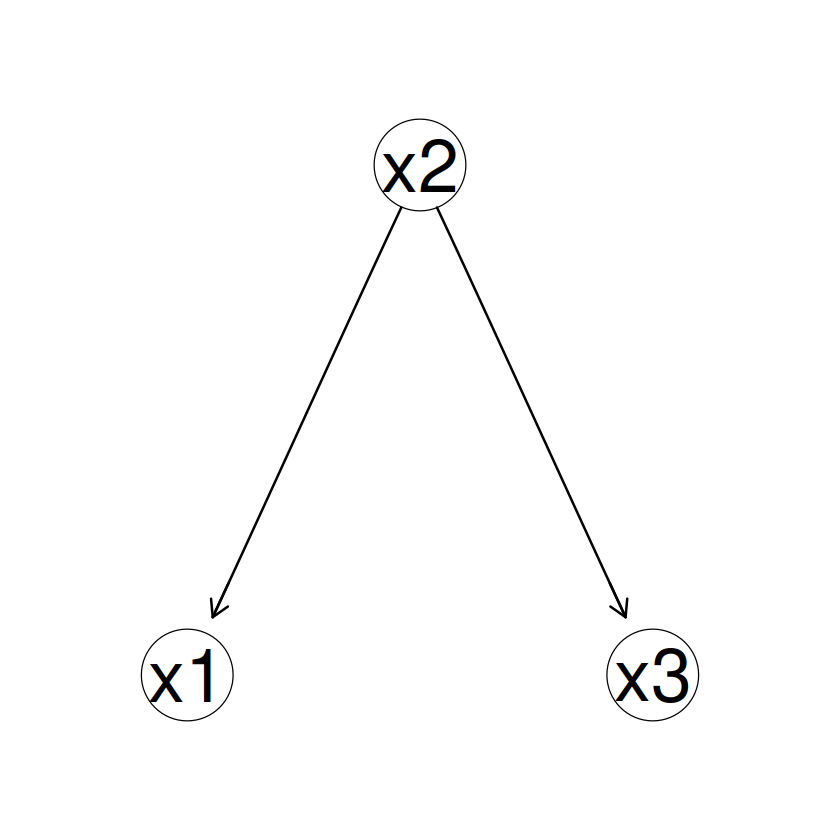

In [10]:
plot(net)

In [11]:
mode(M) = 'character'
DF = data.frame(M, stringsAsFactors = TRUE)
names(DF) = c('x1', 'x2', 'x3')
DF

x1,x2,x3
<fct>,<fct>,<fct>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


In [12]:
struct = list(2, NULL, 2)
struct

[[1]]
[1] 2

[[2]]
NULL

[[3]]
[1] 2

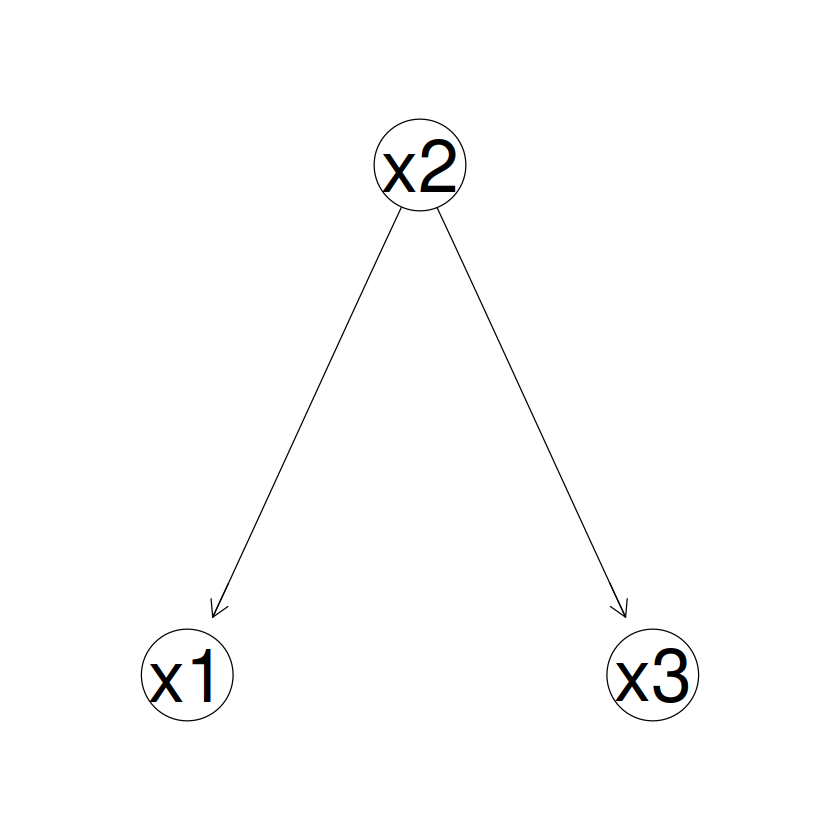

In [13]:
dag = get_dag(names(DF), struct)
graphviz.plot(dag)

In [14]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -20.19397

[1] -21.28154